In [1]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt",delimiter=" ",header=None,names=("data","time","ir","lidar"))
data

,data,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [2]:
print(data["lidar"][0:6534])

0       214
1       211
2       199
3       208
4       212
       ... 
6529    211
6530    215
6531    209
6532    207
6533    206
Name: lidar, Length: 6534, dtype: int64


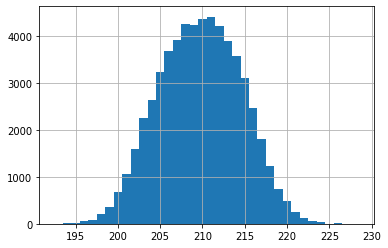

In [3]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins=max(data["lidar"]) - min(data["lidar"]),align="left")
plt.show()

In [4]:
mean = data["lidar"].mean()
mean


209.73713297619855

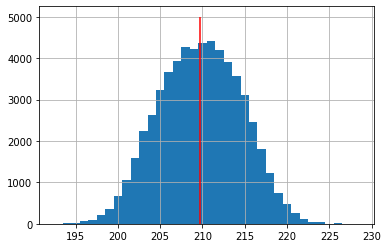

In [5]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins=max(data["lidar"]) - min(data["lidar"]),align="left")
plt.vlines(mean,ymin=0, ymax=5000,color="red")
plt.show()

In [6]:
var = data["lidar"].var()
var


23.40810659855441

In [7]:
import math
stddev = math.sqrt(var)
stddev

4.83819249292072

In [8]:
freps = pd.DataFrame(data["lidar"].value_counts())
freps.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [9]:
freps["probs"] = freps["lidar"]/len(data["lidar"])
freps.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [10]:
sum(freps["probs"])

1.0

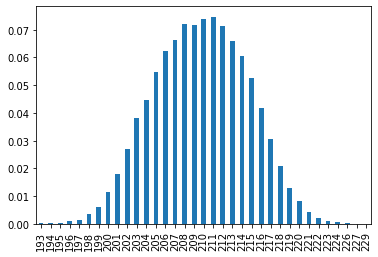

In [11]:
freps["probs"].sort_index().plot.bar()
plt.show()

In [12]:
def drawing():
    return freps.sample(n=1,weights="probs").index[0]

drawing()

215

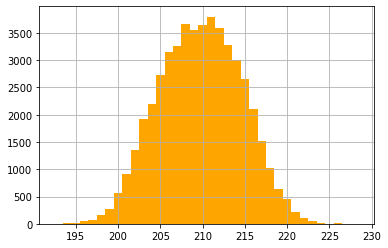

In [15]:
samples = [drawing() for i in range(50000)]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p) - min(p), color="orange",align="left")
plt.show()

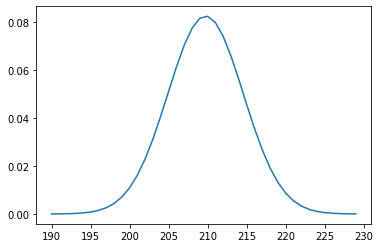

In [14]:
from scipy.stats import norm

zs = range(190,230)
ys = [norm.pdf(z,mean, stddev) for z in zs]

plt.plot(zs,ys)
plt.show()

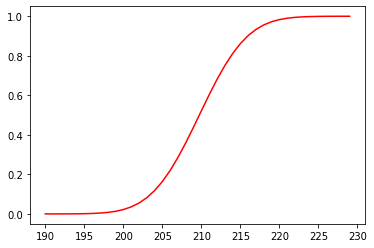

In [18]:
zs = range(190,230)
ys = [norm.cdf(z,mean, stddev) for z in zs]

plt.plot(zs,ys,color="red")
plt.show()

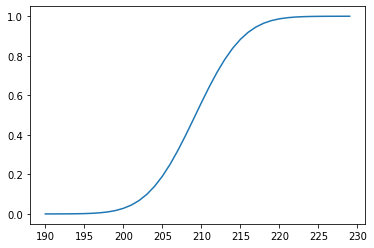

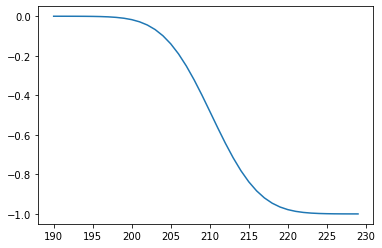

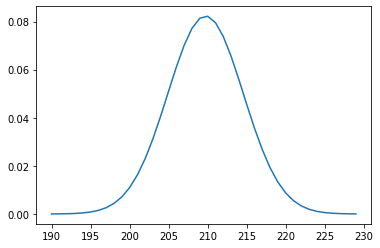

In [21]:
zs = range(190,230)
ys = [norm.cdf(z+0.5,mean, stddev)  for z in zs]

plt.plot(zs,ys)
plt.show()

ys = [ - norm.cdf(z-0.5, mean, stddev) for z in zs]

plt.plot(zs,ys)
plt.show()

ys = [norm.cdf(z+0.5,mean, stddev) - norm.cdf(z-0.5, mean, stddev) for z in zs]

plt.plot(zs,ys)
plt.show()

In [22]:
import random

samples = [random.choice([1,2,3,4,5,6]) for i in range(10000)]
sum(samples) / len(samples)

3.5147